In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# To segment the oranges using HSI color space, we need to define a custom function because HSI is not natively supported in common libraries.

def rgb_to_hsi(rgb_image_array):
    """
    Convert an RGB numpy array to HSI. This is an approximation since true HSI conversion
    is complex and involves conditional transformations.
    
    Parameters:
    rgb_image_array: numpy array of an image with RGB values
    """
    
    # Normalize the RGB values to the range 0-1
    rgb_image_array = rgb_image_array / 255.0
    R, G, B = rgb_image_array[:,:,0], rgb_image_array[:,:,1], rgb_image_array[:,:,2]

    # Calculate intensity
    I = (R + G + B) / 3.0
    
    # Calculate saturation
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-12)) * min_RGB
    
    # Calculate hue
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(num / (den + 1e-12))
    
    H = theta
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)  # Normalize to the range 0-1

    # Combine H, S, and I into one array
    hsi_image_array = np.dstack((H, S, I))
    return hsi_image_array

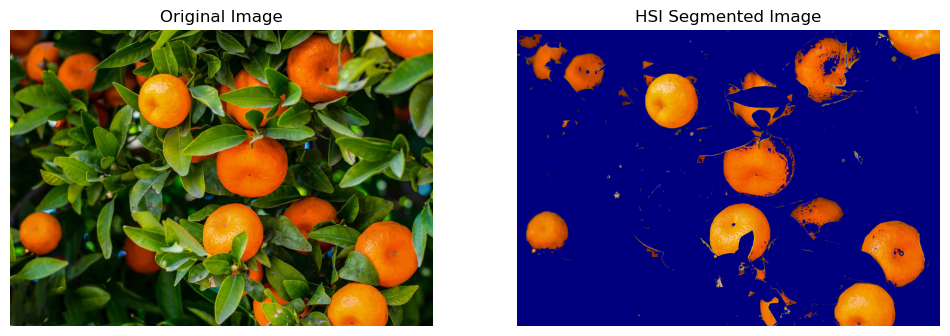

In [18]:
# Load the uploaded image
uploaded_image_path = '../original_images/oranges.jpg'
oranges_image = Image.open(uploaded_image_path)

# Convert the image to numpy array
oranges_image_array = np.array(oranges_image)

# Convert RGB to HSI
hsi_oranges_image = rgb_to_hsi(oranges_image_array)
# Define a range for the color of oranges in the HSI color space
# These values are approximations and can be tuned
# Hue for orange is around 30 degrees or 0.083 in normalized scale
hsi_orange_min = np.array([0.05, 0.1, 0.2])  # HSI minimum range for orange color
hsi_orange_max = np.array([0.15, 1, 1])  # HSI maximum range for orange color

# Create a mask for orange color
hsi_orange_mask = np.all(hsi_oranges_image >= hsi_orange_min, axis=-1) & np.all(hsi_oranges_image <= hsi_orange_max, axis=-1)

# Create an image with blue color where the orange is not present
hsi_segmented_image_array = oranges_image_array.copy()
hsi_segmented_image_array[~hsi_orange_mask] = [0, 0, int(0.5 * 255)]  # RGB value for the blue color

# Convert the array back to an image
hsi_segmented_image = Image.fromarray(hsi_segmented_image_array)

# Display the original and HSI segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(oranges_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hsi_segmented_image)
plt.title('HSI Segmented Image')
plt.axis('off')

plt.show()

# Save the HSI segmented image to the OUTPUT folder
hsi_segmented_image.save('./OUTPUT/BEST_segmented_image.jpg')
